In [40]:
import ctools
import os
import matplotlib.pyplot as plt
import astropy.wcs.utils
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.colors import SymLogNorm, LogNorm
from astropy import units as u
from IPython import display
from lxml import etree
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import random
import math
import cv2
import numpy as np
import time

In [41]:
def run_ctobssim(model, pointing, output, energy=(0.03, 5), time=(0, 100), fov=5, caldb='prod3b-v2', irf='South_z20_0.5h', seed=1):
    sim = ctools.ctobssim()
    sim["inmodel"] = model
    sim["outevents"] = output
    sim["caldb"] = caldb
    sim["irf"] = irf
    sim["ra"] = pointing[0]
    sim["dec"] = pointing[1]
    sim["rad"] = fov
    sim["tmin"] = time[0]
    sim["tmax"] = time[1]
    sim["emin"] = energy[0]
    sim["emax"] = energy[1]
    sim["seed"] = seed
    sim.execute()

In [42]:
def run_skymap(obs, output, energy=(0.03, 5), roi=5, caldb='prod3b-v2', irf='South_z20_0.5h', wbin=0.02):
    nbin = int(roi*2/wbin)
    skymap = ctools.ctskymap()
    skymap['inobs'] = obs
    skymap['outmap'] = output
    skymap['irf'] = irf
    skymap['caldb'] = caldb
    skymap['emin'] = energy[0]
    skymap['emax'] = energy[1]
    skymap['usepnt'] = True
    skymap['nxpix'] = nbin
    skymap['nypix'] = nbin
    skymap['binsz'] = wbin
    skymap['bkgsubtract'] = 'IRF'
    skymap.execute()

In [43]:
def plot_fits_skymap(file, name='skymap.png', title=None, xlabel='right ascension (deg)', ylabel='declination (deg)', figsize=(10, 10), fontsize=20, cmap='magma'):
    # get map
    with fits.open(file) as hdul:
        wcs = WCS(hdul[0].header)
        data = hdul[0].data

    # plot
    fig = plt.figure(figsize=figsize) 
    ax = plt.subplot(projection=wcs)
    img = plt.imshow(data, norm = SymLogNorm(1, vmin = 0), interpolation='gaussian', cmap=cmap)
    ax.coords[0].set_format_unit(u.deg)
    ax.coords[1].set_format_unit(u.deg)
    cb = plt.colorbar(img, ax=ax)
    # axis
    ax.tick_params(axis='both', labelsize=fontsize)
    cb.ax.tick_params(labelsize=fontsize) 
    cb.set_label('counts', fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.grid(color='grey', ls='solid')
    fig.tight_layout()
    fig.savefig(name)
    return

In [44]:
pointing = (83.6331, 22.5145)
pointing_skycoords = SkyCoord(pointing[0], pointing[1], frame='icrs', unit='deg')

In [45]:
def generate_ra_dec(pointing, radius = 3.5):
    a = random.random()
    b = random.random()
    x = radius * math.sqrt(a) * math.cos(2 * math.pi * b)
    y = radius * math.sqrt(a) * math.sin(2 * math.pi * b)
    RA = x + pointing[0]
    DEC = y + pointing[1]
    RA = round(RA, 4)
    DEC = round(DEC, 4)
    return (RA, DEC)

In [46]:
def linear_contrast_stretching(img, max_value, min_value):
    img[img<min_value] = min_value
    img[img>max_value] = max_value
    linear_stretched_img = 255./(max_value-min_value)*(img-min_value)
    return linear_stretched_img

Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


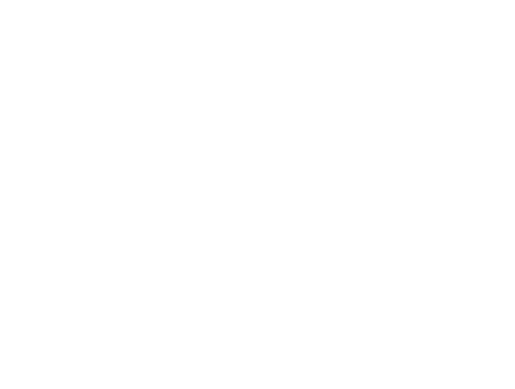

In [47]:
fig_idx = 1000

annotation_file = open('sources_pixels.txt', 'a')


while fig_idx < 2000:
    RA, DEC = generate_ra_dec(pointing)
    random_skycoords = SkyCoord(RA, DEC, frame='icrs', unit='deg')
    tree = etree.parse('group1.xml')
    root = tree.getroot()
    
    root[0][1][0].set('value',str(RA)) #set of RA in the xml
    root[0][1][1].set('value',str(DEC)) #set of DEC in the xml
    tree.write('group1.xml', standalone=False) #write back to file
    model_map = 'group1.xml'
    skymap = 'sim.fits'
    run_ctobssim(model=model_map, pointing=pointing, output=skymap, seed=fig_idx)
    run_skymap(obs=skymap, output=skymap)
    #plot_fits_skymap(file=skymap, name='data/sim.png', figsize=(6, 6), fontsize=15)


    ########### 1 SOURCE IMAGE ###########
    
    with fits.open(skymap) as hdul:
        wcs = WCS(hdul[0].header)
        data = hdul[0].data
        #random_pixelcoords = random_skycoords.to_pixel(wcs)
        random_pixelcoords = astropy.wcs.utils.skycoord_to_pixel(random_skycoords, wcs)
        #print(random_pixelcoords)

        annotation_file.write(str(fig_idx) + "," + str(random_pixelcoords[0]) + "," + str(random_pixelcoords[1]) + "\n")

        # CMAP = GRAY ################

        higher_intensities = data * 10
        sigma = 3
        k_size = int(np.ceil((3*sigma))*2 + 1) #rule of thumb for a good kernel size given sigma
        img_G = cv2.GaussianBlur(higher_intensities, (k_size,k_size) , sigma)
        
        img_stretched = linear_contrast_stretching(img_G, np.max(img_G), 0)
        #plt.imshow(img_stretched, cmap="gray")

        source_coords = (int(random_pixelcoords[0]),int(random_pixelcoords[1]))
        #highlighted = cv2.circle(img_stretched, source_coords, 5, (255, 0, 0), 2)
        #image = cv2.circle(image, center_coordinates, radius, color, thickness)
        #plt.imshow(highlighted, cmap="gray")
        
        plt.axis('off')
        figname = 'sim_gray_stretch' + str(fig_idx) + '.png'
        #fig.savefig(figname, bbox_inches='tight', pad_inches=0)
        plt.imsave(figname, img_stretched, cmap="gray")

    ########### NO SOURCE IMAGE ###########

    model_map_BKG = 'bkg_irf.xml'
    skymap_BKG = 'sim_bkg.fits'
    run_ctobssim(model=model_map_BKG, pointing=pointing, output=skymap_BKG, seed=fig_idx)
    run_skymap(obs=skymap_BKG, output=skymap_BKG)


    with fits.open(skymap_BKG) as hdul:
        wcs = WCS(hdul[0].header)
        data = hdul[0].data

        # CMAP = GRAY ################

        higher_intensities = data * 10
        sigma = 3
        k_size = int(np.ceil((3*sigma))*2 + 1) #rule of thumb for a good kernel size given sigma
        img_G = cv2.GaussianBlur(higher_intensities, (k_size,k_size) , sigma)
        
        img_stretched = linear_contrast_stretching(img_G, np.max(img_G), 0)
        #plt.imshow(img_stretched, cmap="gray")
        plt.axis('off')
        figname = 'BKG-sim_gray_stretch' + str(fig_idx) + '.png'
        #fig.savefig(figname, bbox_inches='tight', pad_inches=0)
        plt.imsave(figname, img_stretched, cmap="gray")

    fig_idx += 1
annotation_file.close()